## Determine and understand the equation required for rebalance size

In [1]:
%load_ext lab_black

In [92]:
import requests
import pandas as pd
import numpy as np
import tqdm
import pickle

from datetime import datetime, timedelta, date

pd.set_option("max_columns", 99)
pd.options.display.float_format = "{:.12f}".format

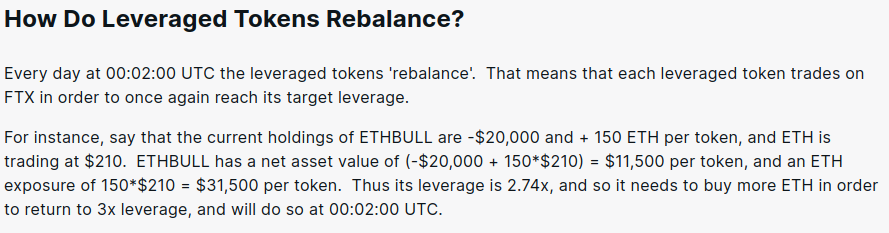

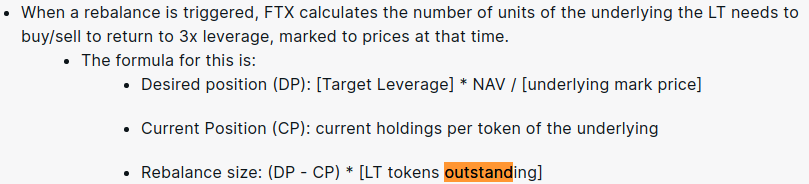

In [177]:
token_data = pd.DataFrame(
    requests.get(f"https://ftx.com/api//lt/tokens").json()["result"]
)
token_data = token_data[token_data.currentLeverage != 0]

In [178]:
token_data.sort_values("change24h").iloc[1]["name"], token_data.sort_values(
    "change24h"
).iloc[-2]["name"]

('EOSHEDGE', 'KNCBEAR')

In [179]:
tokenbull = token_data.loc[token_data.name == "ZECBULL"].iloc[0]
tokenbear = token_data.loc[token_data.name == "ZECBEAR"].iloc[0]

In [180]:
tokenbull.underlyingMark

158.5

In [181]:
dp = 3 * tokenbull.totalNav / tokenbull.underlyingMark
dp

8529.170478296972

In [182]:
cp = tokenbull.positionsPerShare[tokenbull.underlying] * tokenbull.outstanding
cp

8502.699999999999

In [183]:
rebal = dp - cp
rebal

26.470478296972942

In [184]:
rebal_notional = rebal * tokenbull.underlyingMark
rebal_notional

4195.570810070211

In [185]:
def get_underlying_position(x):
    return x.positionsPerShare[x.underlying]


token_data["underlying_position"] = token_data.apply(get_underlying_position, axis=1)
token_data["dp"] = token_data.leverage * token_data.totalNav / token_data.underlyingMark
token_data["cp"] = token_data.underlying_position * token_data.outstanding
token_data["rebalance_underlying"] = token_data["dp"] - token_data["cp"]
token_data["rebalance_usd"] = (
    token_data["rebalance_underlying"] * token_data.underlyingMark
)

In [186]:
token_data.groupby("underlying").rebalance_usd.sum().sort_values(ascending=False)

underlying
EOS-PERP         2463086.603804528713
GRT-PERP           41497.510939949963
COMP-PERP          10550.609271550056
BNB-PERP            7931.276289784104
ZEC-PERP            5236.418165500202
LEO-PERP            4489.477107494989
ASD-PERP            3319.616940359992
UNISWAP-PERP        1701.160343440004
PAXG-PERP           1112.203303785007
HT-PERP              -28.442197690162
USDT-PERP           -152.606611554975
CUSDT-PERP          -332.227498980001
XAUT-PERP           -407.353640624968
PRIV-PERP          -1993.660499289998
TRYB-PERP          -2168.661448154927
DRGN-PERP          -3255.294994955003
TOMO-PERP          -3777.566688795015
MID-PERP           -6091.107444449972
BAL-PERP           -6847.754722080008
OKB-PERP           -9876.451864754990
SUSHI-PERP        -11870.463445615069
ALGO-PERP         -18876.700846140044
MKR-PERP          -20032.380499810002
SHIT-PERP         -29474.233250455000
MATIC-PERP        -43349.875099123841
DEFI-PERP         -45261.089318485057
E